# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
import pandas as pd

In [2]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2025-11-10 18:23:28--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.008s  

2025-11-10 18:23:28 (7.10 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [3]:
# Можно найти осмысленные названия столбцов. Добавим их к датасету для интерпретируемости
columns_raw = 'compactness	circularity	distance_circularity	radius_ratio	pr.axis_aspect_ratio	max.length_aspect_ratio	scatter_ratio	elongatedness	pr.axis_rectangularity	max.length_rectangularity	scaled_variance	scaled_variance.1	scaled_radius_of_gyration	scaled_radius_of_gyration.1	skewness_about	skewness_about.1	skewness_about.2	hollows_ratio	class'
columns_prepared = columns_raw.split()
columns_prepared

['compactness',
 'circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2',
 'hollows_ratio',
 'class']

In [4]:
# Искуственно добавленный столбец с индексом 0 и будет столбцом индексов
dataset = pd.read_csv('car_data.csv', header=None, index_col=0, names=columns_prepared)

In [5]:
dataset.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [6]:
print(dataset.shape)
dataset.head(5)

(846, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [7]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

print(dataset.shape)

(846, 19)


In [8]:
print('Наименования классов', y.unique())
print('Распределения классов', y.value_counts())

print('Нормализованные распределения классов', y.value_counts(normalize=True))

Наименования классов ['van' 'saab' 'bus' 'opel']
Распределения классов class
bus     218
saab    217
opel    212
van     199
Name: count, dtype: int64
Нормализованные распределения классов class
bus     0.257683
saab    0.256501
opel    0.250591
van     0.235225
Name: proportion, dtype: float64


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

Methods `describe` and `info` deliver some useful information.

In [9]:
dataset.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   compactness                  846 non-null    int64 
 1   circularity                  846 non-null    int64 
 2   distance_circularity         846 non-null    int64 
 3   radius_ratio                 846 non-null    int64 
 4   pr.axis_aspect_ratio         846 non-null    int64 
 5   max.length_aspect_ratio      846 non-null    int64 
 6   scatter_ratio                846 non-null    int64 
 7   elongatedness                846 non-null    int64 
 8   pr.axis_rectangularity       846 non-null    int64 
 9   max.length_rectangularity    846 non-null    int64 
 10  scaled_variance              846 non-null    int64 
 11  scaled_variance.1            846 non-null    int64 
 12  scaled_radius_of_gyration    846 non-null    int64 
 13  scaled_radius_of_gyration.1  846 non-nul

# SHAPLEY/RFE

In [ ]:
# Для отбора признаков
# можно использовать с gradient boosting и нейронными сетями для интепретируемости

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, make_scorer, average_precision_score



#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

1. No missing values
2. Feature scaling

In [12]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state = 42,
                                                    stratify=y)

# Масштабирование только по тренировочным данным и применение к train, test затем
scaler = StandardScaler()
scaler.fit(X_train)

X_train_standart = scaler.transform(X_train)
X_test_standart = scaler.transform(X_test)

In [13]:
y_train.value_counts(normalize=True)

,proportion
class,
bus,0.258446
saab,0.256757
opel,0.250000
van,0.234797


In [14]:
y_test.value_counts(normalize=True)

,proportion
class,
bus,0.255906
saab,0.255906
opel,0.251969
van,0.236220


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

**$$F1-MACRO$$**

**Формулы для каждого класса l:**

$$
\text{precision}_l = \frac{TP_l}{TP_l + FP_l}
$$

$$
\text{recall}_l = \frac{TP_l}{TP_l + FN_l}
$$

$$
F1_l = 2 \times \frac{\text{precision}_l \times \text{recall}_l}{\text{precision}_l + \text{recall}_l}
$$

---

**Макро-усреднение по всем классам:**

$$
F1_{\text{macro}} = \frac{1}{L} \sum_{l=1}^L F1_l
$$

где L - число классов.

---

**Недостатки f1-macro**:

1) Оценка может быть занижена, если много редких классов

2) Нет учета важности классов

**$$F1-WEIGHTED$$**

**Формулы для каждого класса l:**

$$
\text{precision}_l = \frac{TP_l}{TP_l + FP_l}
$$

$$
\text{recall}_l = \frac{TP_l}{TP_l + FN_l}
$$

$$
F1_l = 2 \times \frac{\text{precision}_l \times \text{recall}_l}{\text{precision}_l + \text{recall}_l}
$$

$$\text{support}_l = \text{число объектов класса } l$$

---

**Взвешенное усреднение F1 по всем классам:**

$$
F1_{weighted} = \frac{\sum_{l=1}^{L} \text{support}_l \times F1_l}{\sum_{l=1}^{L} \text{support}_l}
$$



где L - число классов.

---

**Недостатки f1-weighted**:

1) Плохое качество предсказания редких классов может быть незаметно

2) Ложное чувство хорошего качества, если модель хорошо предсказывает только доминирующие классы

**Вывод** в f1-weighted бОльший вклад вносит доминирующий класс

In [15]:
# sklearn logreg always uses softmax
def grid_search_cv(X_train, y_train):
    model = LogisticRegression(
                               max_iter = 1000,
                               solver = 'saga', #learning rate inside
                               tol = 1e-3,
                               random_state=42)
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100], # чем меньше, тем сильнее
        'penalty': ['l1', 'l2']
    }
    # StratifiedShuffleSplit сохраняет распределение классов,
    # выборки в отличие от StratifiedKFold могут пересекаться
    cv_methods = {'StratifiedShuffleSplit': StratifiedShuffleSplit(n_splits=10,
                                test_size = 0.2,
                                random_state=42),
                  'StratifiedKFold': StratifiedKFold(n_splits=10,
                                shuffle=True,
                                random_state=42)
    }

    scoring = {'accuracy': 'accuracy',
               'f1_macro': 'f1_macro',
               'f1_weighted': 'f1_weighted',
               'roc_auc_ovr': 'roc_auc_ovr'}
    results = {}

    for cv_name, cv in cv_methods.items():
        grid_search = GridSearchCV(model,
                                  param_grid,
                                  cv=cv,
                                  scoring=scoring,
                                  # refit='accuracy', # метрика для выбора лучшей модели
                                  refit='f1_macro', # метрика для выбора лучшей модели
                                  return_train_score=False) # включать ли в статистику метрики на трейне

        grid_search.fit(X_train, y_train)

        results[cv_name] = {
            "Best parameters": grid_search.best_params_,
            "Best accuracy": grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_],
            "F1 macro": grid_search.cv_results_['mean_test_f1_macro'][grid_search.best_index_],
            "F1 weighted": grid_search.cv_results_['mean_test_f1_weighted'][grid_search.best_index_],
            "ROC-AUC": grid_search.cv_results_['mean_test_roc_auc_ovr'][grid_search.best_index_],
        }

    return results

In [16]:
# f1 macro, f1 weighted
%%time
grid_search_cv(X_train_standart, y_train)

CPU times: user 18.4 s, sys: 13.7 ms, total: 18.4 s
Wall time: 18.7 s


{'StratifiedShuffleSplit': {'Best parameters': {'C': 10, 'penalty': 'l1'},
  'Best accuracy': np.float64(0.7941176470588236),
  'F1 macro': np.float64(0.794040919865029),
  'F1 weighted': np.float64(0.792241744204796),
  'ROC-AUC': np.float64(0.9456043017201303)},
 'StratifiedKFold': {'Best parameters': {'C': 10, 'penalty': 'l2'},
  'Best accuracy': np.float64(0.7803954802259887),
  'F1 macro': np.float64(0.7790447104031519),
  'F1 weighted': np.float64(0.7764824232147),
  'ROC-AUC': np.float64(0.9395913796751921)}}

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
print(y_train_encoded.shape)
print(y_train.shape)

(592,)
(592,)


In [18]:
# sklearn logreg always uses softmax
def random_search_cv(X_train, y_train):
    model = LogisticRegression(max_iter = 1000,
                               solver = 'saga', #learning rate inside
                               tol = 1e-3,
                               random_state=42)
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100], # чем меньше, тем сильнее
        'penalty': ['l1', 'l2']
    }
    # StratifiedShuffleSplit сохраняет распределение классов,
    # выборки в отличие от StratifiedKFold могут пересекаться
    cv_methods = {'StratifiedShuffleSplit': StratifiedShuffleSplit(n_splits=10,
                                test_size = 0.2,
                                random_state=42),
                  'StratifiedKFold': StratifiedKFold(n_splits=10,
                                shuffle=True,
                                random_state=42)
    }

    scoring = {'accuracy': 'accuracy',
               'f1_macro': 'f1_macro',  # считаю, что она лучше для несбалансир классов
               'f1_weighted': 'f1_weighted',  # а для сбалансированных классов особой разницы нет
               'roc_auc_ovr': 'roc_auc_ovr'
              #  'pr_auc': make_scorer(macro_pr_auc, needs_proba=True)
    }
    results = {}

    for cv_name, cv in cv_methods.items():
        random_search = RandomizedSearchCV(model,
                                  param_grid,
                                  cv=cv,
                                  n_iter = 10,
                                  scoring=scoring,
                                  # refit='accuracy', # метрика для выбора лучшей модели
                                  refit='f1_macro',
                                  return_train_score=False)

        random_search.fit(X_train, y_train_encoded)

        results[cv_name] = {
            "Best parameters": random_search.best_params_,
            "Best accuracy": random_search.cv_results_['mean_test_accuracy'][random_search.best_index_],
            "F1 macro": random_search.cv_results_['mean_test_f1_macro'][random_search.best_index_],
            "F1 weighted": random_search.cv_results_['mean_test_f1_weighted'][random_search.best_index_],
            "ROC-AUC": random_search.cv_results_['mean_test_roc_auc_ovr'][random_search.best_index_],

        }

    return results

Выбор лучшей модели происходит по f1-macro, а f1-weighted, accuracy, roc-auc просто выводятся для этой комбинации гиперпараметров

In [19]:
%%time
random_search_cv(X_train_standart, y_train)

CPU times: user 14.2 s, sys: 8.16 ms, total: 14.2 s
Wall time: 14.3 s


{'StratifiedShuffleSplit': {'Best parameters': {'penalty': 'l2', 'C': 100},
  'Best accuracy': np.float64(0.7932773109243698),
  'F1 macro': np.float64(0.7934386825595213),
  'F1 weighted': np.float64(0.7916274599444243),
  'ROC-AUC': np.float64(0.9456496728861845)},
 'StratifiedKFold': {'Best parameters': {'penalty': 'l1', 'C': 1},
  'Best accuracy': np.float64(0.780367231638418),
  'F1 macro': np.float64(0.7779574173530285),
  'F1 weighted': np.float64(0.7752712391352333),
  'ROC-AUC': np.float64(0.9352982203712898)}}

**Выводы**

1) Лучше по StratifiedKFold l2, C = 10 и по RandomizedSearchCV и по GridSearchCV. Но результат, конечно, интересный

2) ROC-AUC имеет вероятностную природу, поэтому он выше. Модель выдает хорошие вероятности, но иногда ошибается в выборе максимального класса

3) Accuracy и f1 показывают, что жесткие предсказания модели дают 77% правильных результатов

In [21]:
# penalty_base, C_base = grid_search_cv(X_train_standart)[0]['penalty'], grid_search_cv(X_train_standart)[0]['C']

penalty_base = 'l2'
C_base = 10

In [22]:
!pip install scikit-plot

Для построения roc-plot ниже необходимо раскомментировать !pip install scipy==1.9.3, затем закомментировать снова, перезапустить сеанс и выполнить весь код.

Это позволяет добиться совместимости версий

Как строится **ROC-AUC для многоклассовой классификации**

1. Подход One-vs-Rest (OvR)
Для каждого класса строится ROC-кривая, рассматривая этот класс как положительный, а все остальные - как отрицательные. Таким образом получается по одной ROC-кривой на каждый класс. Итоговое значение AUC можно усреднить по классам (например, макро-усреднением).

2. Подход One-vs-One (OvO)
Строятся ROC-кривые для каждой пары классов, а затем результаты агрегируются.

3. Многоклассовый ROC-AUC
Некоторые реализации (например, в scikit-learn) позволяют вычислять мультиклассовый ROC-AUC, используя методы усреднения (macro, weighted).

In [25]:
# для отображения кривой roc-auc
import numpy as np
from scipy import interpolate
import scipy
scipy.interp = np.interp
import scikitplot as skplt

In [27]:
def roc_plot(X_train, X_test, penalty, C):
    model = LogisticRegression(max_iter=500,
                               solver='saga',
                               tol=1e-3,
                               C = C,
                               penalty=penalty,)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_pred))
    print("   f1:    ", f1_score(y_test, y_pred, average = "weighted"))

    y_pred = model.predict_proba(X_test) # gives the probability for each class to be correctly classified   (297,4)
    skplt.metrics.plot_roc(y_test, y_pred)
    plt.show()

accuracy:  0.8464566929133859
   f1:     0.8459536918705765


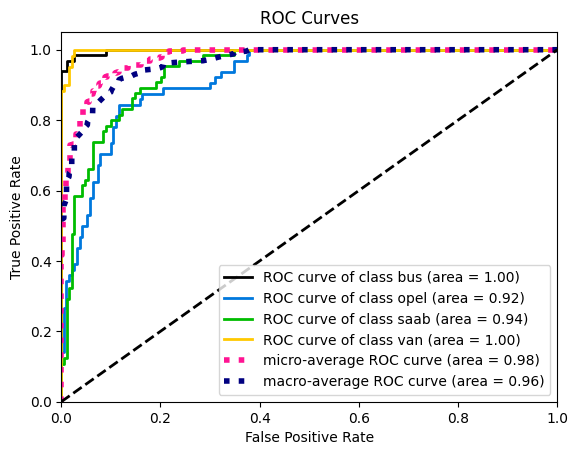

In [ ]:
roc_plot(X_train_standart, X_test_standart, penalty_base, C_base)

**Вывод**: данные настолько игрушечные, что скоры прекрасны

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
pca.fit(X_train_standart)  # предварительная стандартизация важна, чтобы уравнять вклад признаков
pca.explained_variance_ratio_

array([5.21023564e-01, 1.67594218e-01, 1.09341988e-01, 6.84856193e-02,
       4.79770123e-02, 2.90598346e-02, 2.00179251e-02, 1.17788623e-02,
       8.67328039e-03, 5.19349467e-03, 3.54092810e-03, 2.42667156e-03,
       1.85757968e-03, 1.08376051e-03, 8.45899902e-04, 7.25423704e-04,
       3.52877805e-04, 2.10605307e-05])

**Важно понимать**, что это уже не исходные признаки, а преобразованные в иных пространствах => нельзя просто взять и отобрать некоторые исходные признаки для дальнейшего построения моделей

In [29]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Предположим, у вас есть DataFrame X_train_standart и список названий признаков
feature_names = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
                 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness',
                 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance',
                 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
                 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio', 'class']

# Обучаем PCA
pca = PCA(n_components=18)
pca.fit(X_train_standart)

# Дисперсия, объяснённая каждой компонентой
explained_variance = pca.explained_variance_

# Коэффициенты компонент (веса исходных признаков)
components = pca.components_

# Создаём DataFrame с весами признаков для каждой компоненты
loadings = pd.DataFrame(components.T, index=feature_names[:-1], columns=[f'PC{i+1}' for i in range(18)])

print("\nFeature loadings for PC1:")
print(loadings['PC1'].sort_values(ascending=False))
print("\nFeature loadings for PC2:")
print(loadings['PC2'].sort_values(ascending=False))

# Абсолютные значения весов, чтобы понять вклад признаков
abs_loadings = loadings.abs()
print("\nTop features contributing to PC2:")
print(abs_loadings['PC2'].sort_values(ascending=False).head(5))



Feature loadings for PC1:
scatter_ratio                  0.317905
scaled_variance.1              0.315604
pr.axis_rectangularity         0.315187
scaled_variance                0.311244
distance_circularity           0.304579
circularity                    0.294539
max.length_rectangularity      0.281288
compactness                    0.274873
scaled_radius_of_gyration      0.270768
radius_ratio                   0.267773
max.length_aspect_ratio        0.083279
hollows_ratio                  0.078893
pr.axis_aspect_ratio           0.078353
skewness_about.1               0.049920
skewness_about.2               0.036989
skewness_about                 0.033527
scaled_radius_of_gyration.1   -0.024929
elongatedness                 -0.314632
Name: PC1, dtype: float64

Feature loadings for PC2:
skewness_about.2               0.537705
hollows_ratio                  0.534194
radius_ratio                   0.165393
compactness                    0.139165
skewness_about.1               0.132751


**Вывод**: в каждую из новых фичей после PCA вносят вклад разные фичи датасета в разных пропорциях. По сути это линейные комбинации

In [30]:
# Свойство: сумма элементов этого массива = 1. Так как это доли дисперсий от компонент
pca.explained_variance_ratio_.sum()

np.float64(0.9999999999999999)

Text(0, 0.5, 'Explained Variance')

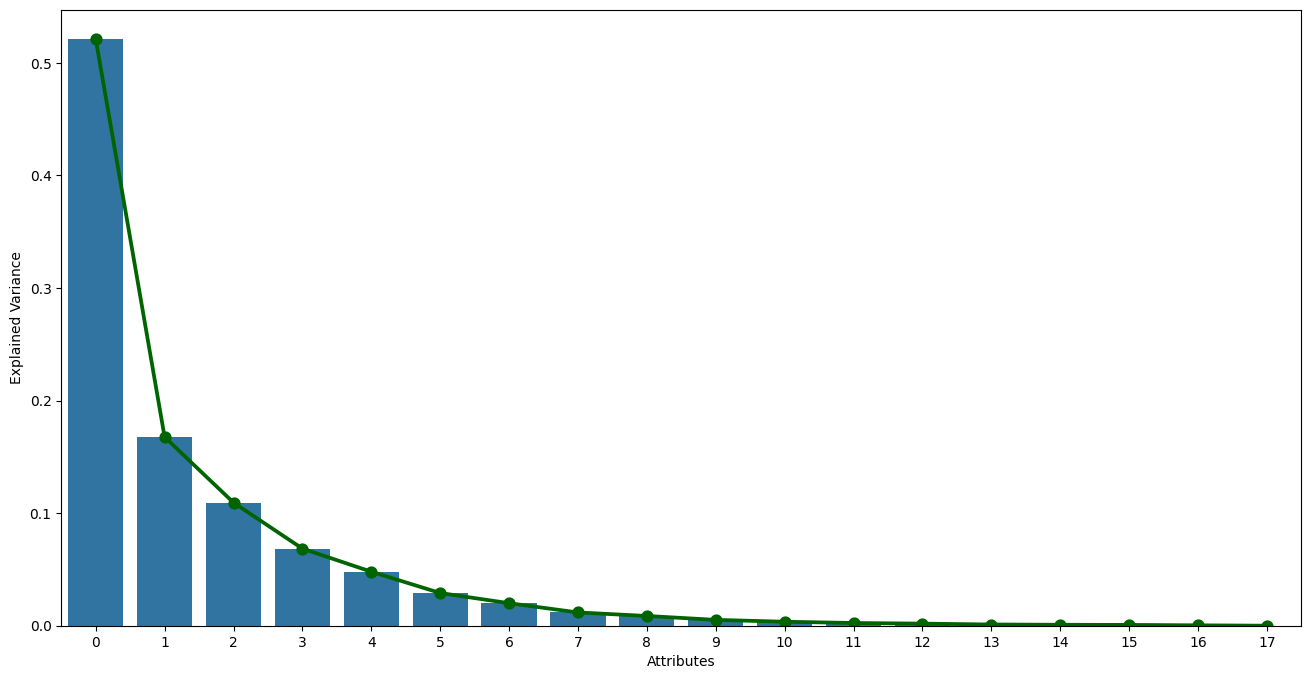

In [31]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sns.barplot(pca.explained_variance_ratio_, ax=axes)
plot = sns.pointplot(pca.explained_variance_ratio_, ax=axes, color='darkgreen')
plot.set_xlabel('Attributes')
plot.set_ylabel('Explained Variance')

**From this graph we can observe that 8-9 attributes will be enough for further investigation. It's important to notice that the basis was changed and reduced during PCA procedure.**

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

**The data was normalized in 2.0. step (scaling). If not, we will not obtain correct variance and will not choose correct principal components (vectors).**


To compute low-rank approximation, we need to compute **singular value decomposition** (SVD).

**Theorem** Any matrix $A\in \mathbb{C}^{n\times m}$ can be written as a product of three matrices:  

$$ A = U \Sigma V^*, $$

where
- $U$ is an $n \times K$ unitary matrix,
- $V$ is an $m \times K$ unitary matrix, $K = \min(m, n)$,
- $\Sigma$ is a diagonal matrix with non-negative elements $\sigma_1 \geq  \ldots, \geq \sigma_K$ on the diagonal.
- Moreover, if $\text{rank}(A) = r$, then $\sigma_{r+1} = \dots = \sigma_K = 0$.

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [32]:
pca = PCA(n_components=8)

# Учимся только на train, чтобы избежать data leakage
pca.fit(X_train_standart)
X_train_pca = pca.transform(X_train_standart)

# Применяем к test параметры, выученные на train
X_test_pca = pca.transform(X_test_standart)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

In [33]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),  # Стандартизация
    ('pca', PCA(n_components=0.95))   # PCA
])

# Обучение и преобразование тренировочных данных
X_train_pca = pipe.fit_transform(X_train)

# Преобразование тестовых данных (без fit!)
X_test_pca = pipe.transform(X_test)

print(f"Количество выбранных компонент: {pca.n_components_}")
print(f"Объяснённая дисперсия: {sum(pca.explained_variance_ratio_):.4f}")

Количество выбранных компонент: 8
Объяснённая дисперсия: 0.9753


#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [34]:
random_search_cv(X_train_pca, y_train)

{'StratifiedShuffleSplit': {'Best parameters': {'penalty': 'l1', 'C': 1},
  'Best accuracy': np.float64(0.6420168067226889),
  'F1 macro': np.float64(0.630905631688816),
  'F1 weighted': np.float64(0.6279769051732582),
  'ROC-AUC': np.float64(0.857235542530098)},
 'StratifiedKFold': {'Best parameters': {'penalty': 'l2', 'C': 10},
  'Best accuracy': np.float64(0.633361581920904),
  'F1 macro': np.float64(0.6209165176584909),
  'F1 weighted': np.float64(0.617499299278889),
  'ROC-AUC': np.float64(0.8422176682118859)}}

In [35]:
random_search_cv(X_train, y_train)

{'StratifiedShuffleSplit': {'Best parameters': {'penalty': 'l1', 'C': 1},
  'Best accuracy': np.float64(0.7344537815126051),
  'F1 macro': np.float64(0.7262674551002414),
  'F1 weighted': np.float64(0.7243673007494646),
  'ROC-AUC': np.float64(0.9112064533591161)},
 'StratifiedKFold': {'Best parameters': {'penalty': 'l2', 'C': 1},
  'Best accuracy': np.float64(0.7127118644067796),
  'F1 macro': np.float64(0.7017730868716279),
  'F1 weighted': np.float64(0.6989466992426268),
  'ROC-AUC': np.float64(0.9024431441231082)}}

In [39]:
penalty_pca = random_search_cv(X_train_pca, y_train)['StratifiedShuffleSplit']['Best parameters']['penalty']
C_pca = random_search_cv(X_train_pca, y_train)['StratifiedShuffleSplit']['Best parameters']['C']

accuracy:  0.6220472440944882
   f1:     0.6132938589353597


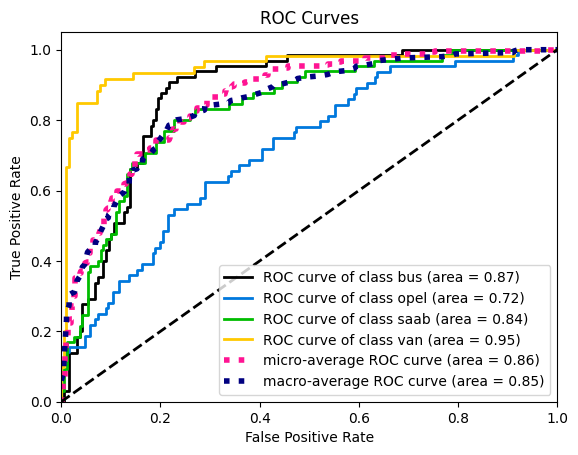

In [40]:
roc_plot(X_train_pca, X_test_pca, penalty_pca, C_pca)

**Вывод**

1) После применения PCA все метрики упали

2) Возможная причина: Компоненты с максимальной дисперсией могут не соответствовать признакам, важным для разделения классов

**Applying PCA doesn't lead to better results**

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
def grid_search_tree(X_train, y_train):
    model = DecisionTreeClassifier(random_state = 42)
    param_dist = {'max_depth': range(1, 10)}
    cv = StratifiedKFold(n_splits=10,
                         random_state = 42,
                         shuffle=True)

    scoring = {'accuracy': 'accuracy',
               'f1_macro': 'f1_macro',
               'f1_weighted': 'f1_weighted',
               'roc_auc_ovr': 'roc_auc_ovr'}

    grid_search = GridSearchCV(model,
                               param_dist,
                               cv=cv,
                               scoring=scoring,
                               refit='f1_macro')

    grid_result = grid_search.fit(X_train, y_train)

    results = {
        "Best parameters": grid_search.best_params_,
        "Best accuracy": grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_],
        "F1 macro": grid_search.cv_results_['mean_test_f1_macro'][grid_search.best_index_],
        "F1 weighted": grid_search.cv_results_['mean_test_f1_weighted'][grid_search.best_index_],
        "ROC-AUC": grid_search.cv_results_['mean_test_roc_auc_ovr'][grid_search.best_index_]
    }

    return results

In [43]:
X_train.shape

(592, 18)

In [44]:
grid_search_tree(X_train, y_train)

{'Best parameters': {'max_depth': 9},
 'Best accuracy': np.float64(0.7162429378531072),
 'F1 macro': np.float64(0.7133634082861298),
 'F1 weighted': np.float64(0.712262819764193),
 'ROC-AUC': np.float64(0.830943620692657)}

In [45]:
# max_depth = grid_search_tree(X_train)[0]['max_depth']
max_depth = 9

In [46]:
def roc_plot_tree(X_train, X_test, max_depth):
    model = DecisionTreeClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_pred))
    print("   f1:    ", f1_score(y_test, y_pred, average = "weighted"))

    y_pred = model.predict_proba(X_test) # gives the probability for each class to be correctly classified
    skplt.metrics.plot_roc(y_test, y_pred)
    plt.show()

accuracy:  0.6968503937007874
   f1:     0.7002159000374073


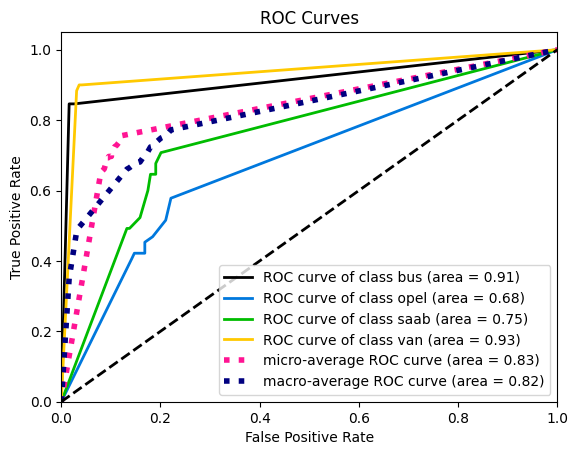

In [47]:
roc_plot_tree(X_train, X_test, max_depth)

**Here we can see that using decision tree gives worse results (f1, accuracy), than logistic regression. Innaccuracy however is expected for decision trees. They are not good in classifying new samples (overfitting is observed). This problem with low accuracy can be and will be solved in 2.6, 2.7.**

#### 2.6. Bagging (Bootstrap aggregating).
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensemble varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this task. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

**Actually N is a number of decision trees for further usage in random forest. Using this approach helps to solve main trees problem - high variance via averaging the results on every tree.**

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np
N_min = 2
N_max = 100
step = 5

In [49]:
def bagging_logreg(X_train, X_test, C, penalty, N_min, N_max, step):

    accuracy_logreg = []
    f1_logreg = []

    for n in np.arange(N_min, N_max + 1, 5): # 2, 7, 12, ....
        bagging_logreg = BaggingClassifier(estimator=LogisticRegression(
                                                    max_iter=500,
                                                    solver='saga',
                                                    tol=1e-3,
                                                    C = C,
                                                    penalty = penalty,
                                                    random_state = 42,
                                                    n_jobs=-1
                                                    ),
                                       n_estimators=n,
                                       random_state = 42,
                                       bootstrap=True)

        with ignore_warnings(category=ConvergenceWarning):
            bagging_logreg.fit(X_train, y_train)

        y_pred = bagging_logreg.predict(X_test)

        f1 = f1_score(y_test, y_pred, average='macro')
        accuracy = accuracy_score(y_test, y_pred)

        accuracy_logreg.append(accuracy)
        f1_logreg.append(f1)

    plt.figure(figsize=(12, 6))
    plt.plot(range(N_min, N_max, step), f1_logreg, label='F1 Score', marker='o')
    plt.plot(range(N_min, N_max, step), accuracy_logreg, label='Accuracy', marker='o')
    plt.xlabel('Number of Subsets')
    plt.ylabel('Score')
    plt.title('F1 Score and Accuracy in Bagging Ensemble. Logistic Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

    return accuracy_logreg, f1_logreg

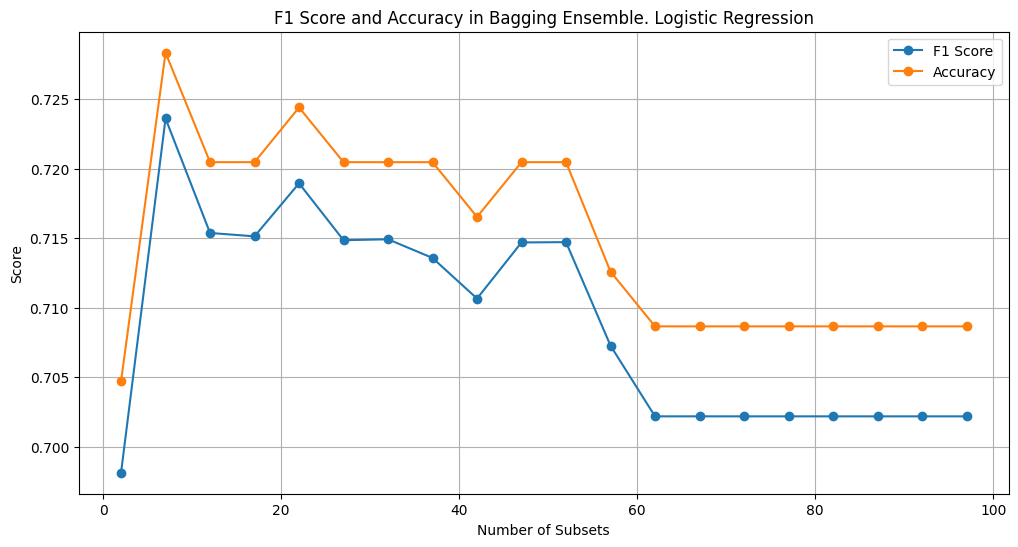

CPU times: user 2min 29s, sys: 865 ms, total: 2min 30s
Wall time: 2min 36s


In [50]:
%%time
accuracy_logreg, f1_logreg = bagging_logreg(X_train, X_test, C_base, penalty_base, N_min, N_max, step)

In [51]:
print(accuracy_logreg)
print(f1_logreg)

[0.7047244094488189, 0.7283464566929134, 0.7204724409448819, 0.7204724409448819, 0.7244094488188977, 0.7204724409448819, 0.7204724409448819, 0.7204724409448819, 0.7165354330708661, 0.7204724409448819, 0.7204724409448819, 0.7125984251968503, 0.7086614173228346, 0.7086614173228346, 0.7086614173228346, 0.7086614173228346, 0.7086614173228346, 0.7086614173228346, 0.7086614173228346, 0.7086614173228346]
[0.6981328093576511, 0.7236152366442336, 0.7153796015548015, 0.71513767783462, 0.7189508845154442, 0.7148593033760499, 0.7149260461760462, 0.713582294234208, 0.7106628531286066, 0.7146987302422944, 0.7147197746335677, 0.7072733918128655, 0.7021879596447176, 0.7021886231202679, 0.7021879596447176, 0.7021879596447176, 0.7021879596447176, 0.7021879596447176, 0.7021879596447176, 0.7021879596447176]


**The most appropriate ensemble size is 10 algorithms**

In [52]:
def bagging_decision_tree(X_train, X_test, max_depth, N_min, N_max, step):

    f1_forest = []
    accuracy_forest = []

    for n_estimators in range(N_min, N_max + 1, step):
        bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(
                                                    max_depth=max_depth,
                                                    criterion='entropy',
                                                    random_state=42
                                                    ),
                                        n_estimators=n_estimators,
                                        random_state=42,
                                        bootstrap=True,
                                        n_jobs=-1)

        bagging_clf.fit(X_train, y_train)
        y_pred = bagging_clf.predict(X_test)

        f1 = f1_score(y_test, y_pred, average='macro')
        accuracy = accuracy_score(y_test, y_pred)

        f1_forest.append(f1)
        accuracy_forest.append(accuracy)

    plt.figure(figsize=(12, 6))
    plt.plot(range(N_min, N_max, step), f1_forest, label='F1 Score', marker='o')
    plt.plot(range(N_min, N_max, step), accuracy_forest, label='Accuracy', marker='o')
    plt.xlabel('Ensemble size')
    plt.ylabel('Score')
    plt.title('F1 Score and Accuracy in Bagging Ensemble. Decision trees')
    plt.legend()
    plt.grid(True)
    plt.show()

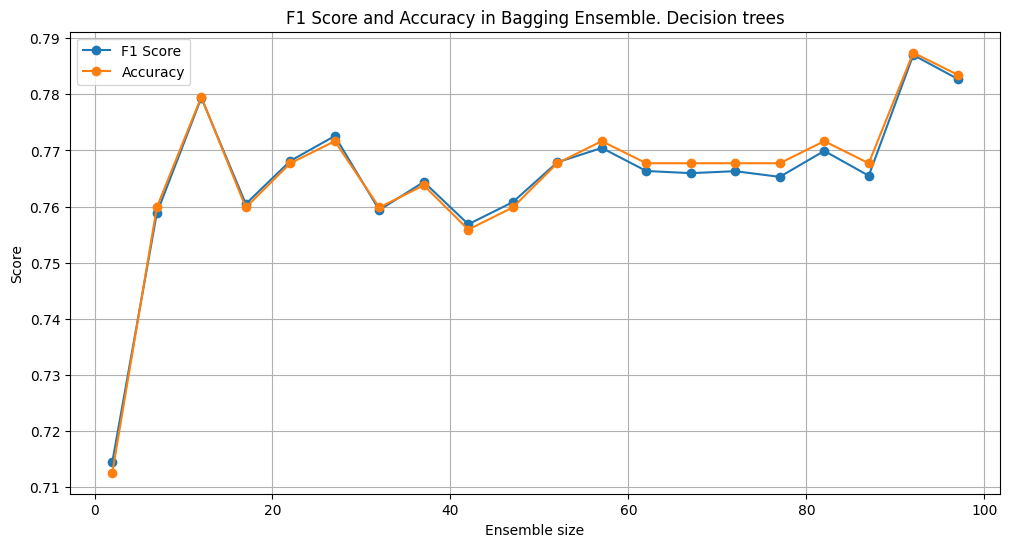

In [53]:
bagging_decision_tree(X_train, X_test, max_depth, N_min, N_max, step)

In [54]:
max_depth

9

**Analyzing the plots gives us the information about the optimal size ensemble (about 90-95 trees).**

**Optimal parameters for decision tree from 2.5 (max_depth) are appropriate for bagging, because they minimize bias.**

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
def random_forest(X_train, X_test, max_depth, N_min, N_max, step):

    accuracy = []
    f1 = []
    ensemble_sizes = np.arange(N_min, N_max + 1, step)

    for n_estimators in ensemble_sizes:
        rand_forest_clf = RandomForestClassifier(n_estimators=n_estimators,
                                                 random_state=42,
                                                 n_jobs=-1,
                                                 max_depth=max_depth)
        rand_forest_clf.fit(X_train, y_train)
        y_pred = rand_forest_clf.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred, average='weighted'))

    plt.figure(figsize=(12, 6))
    plt.plot(ensemble_sizes, f1, label='F1 Score', marker='o')
    plt.plot(ensemble_sizes, accuracy, label='Accuracy', marker='o')
    plt.xlabel('Ensemble size')
    plt.ylabel('Score')
    plt.title('F1 Score and Accuracy. Random Forest')
    plt.legend()
    plt.grid(True)
    plt.show()

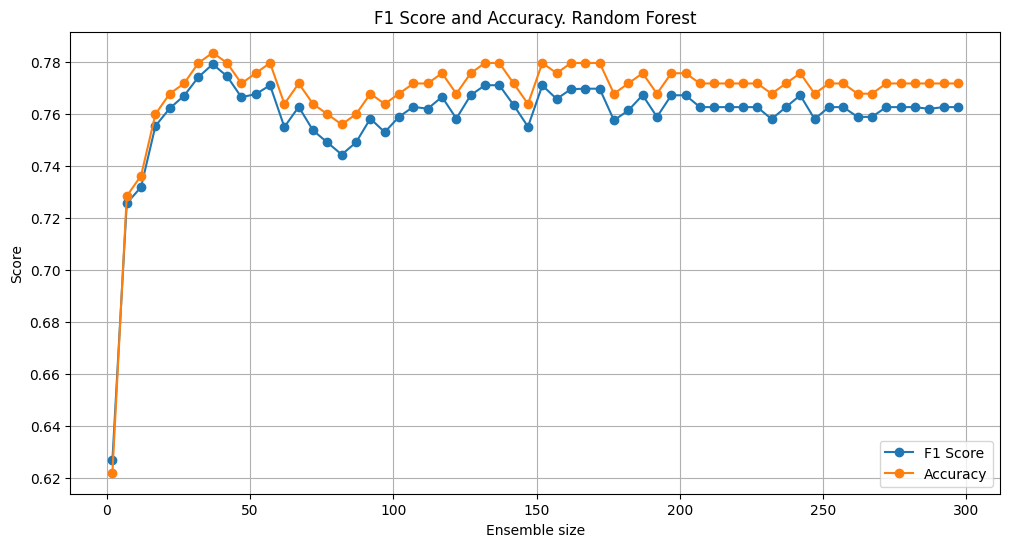

In [57]:
random_forest(X_train, X_test, max_depth, N_min, 300, step)

Чем больше деревьев, тем лучше. Можно доказать.

In [60]:
n_estimators = 110

**Random forest approach helps to find N (number of decision trees) and also adds Random Subspace Method (RSM). RSM helps to obtain different trees on each step via taking random feature subspace in every node of a tree.**

Вообще по математике разницы быть не должно. Чем больше деревьев, тем лучше

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [58]:
def learning_curve(X_train, X_test, C, penalty, max_depth, n_estimators):
    dataset_size = []

    lr_acc = []
    dt_acc = []
    rf_acc = []

    lr_f1 = []
    dt_f1 = []
    rf_f1 = []

    lr = LogisticRegression(max_iter=500,
                                 solver='saga', tol=1e-3,
                                 penalty=penalty,
                                 C = C,
                                 random_state=42,
                                 n_jobs=-1)

    dt = DecisionTreeClassifier(max_depth=max_depth,
                                criterion='entropy',
                                random_state=42)

    rf = RandomForestClassifier(n_estimators=n_estimators,
                                random_state=42,
                                n_jobs=-1)
    parts = 10

    X_parts = np.array_split(X_train, parts)
    y_parts = np.array_split(y_train, parts)

    X_united_parts = []
    y_united_parts = []

    for i in range(1, parts + 1):
        X_united_parts = np.concatenate(X_parts[:i], axis = 0)
        y_united_parts = np.concatenate(y_parts[:i], axis = 0)

        #Logistic Regression
        lr.fit(X_united_parts, y_united_parts)
        lr_y_pred = lr.predict(X_test)
        lr_acc.append(accuracy_score(y_test, lr_y_pred))
        lr_f1.append(f1_score(y_test, lr_y_pred, average='weighted'))

        # Decision Tree
        dt.fit(X_united_parts, y_united_parts)
        dt_y_pred = dt.predict(X_test)
        dt_acc.append(accuracy_score(y_test, dt_y_pred))
        dt_f1.append(f1_score(y_test, dt_y_pred, average='weighted'))

        # Random Forest
        rf.fit(X_united_parts, y_united_parts)
        rf_y_pred = rf.predict(X_test)
        rf_acc.append(accuracy_score(y_test, rf_y_pred))
        rf_f1.append(f1_score(y_test, rf_y_pred, average='weighted'))

        dataset_size.append(X_united_parts.shape[0])


    plt.figure(figsize=(12, 6))
    plt.plot(dataset_size, lr_f1, label='F1 Score Logistic Regression')
    plt.plot(dataset_size, lr_acc, label='Accuracy Logistic Regression')

    plt.plot(dataset_size, dt_f1, label='F1 Score Decision Tree')
    plt.plot(dataset_size, dt_acc, label='Accuracy Decision Tree')

    plt.plot(dataset_size, rf_f1, label='F1 Score Random Forest')
    plt.plot(dataset_size, rf_acc, label='Accuracy Random Forest')

    plt.xlabel('Train Dataset size')
    plt.ylabel('Score')
    plt.title('Accuracy and F1-score For Different Train Dataset Sizes')
    plt.legend()
    plt.grid(True)
    plt.show()

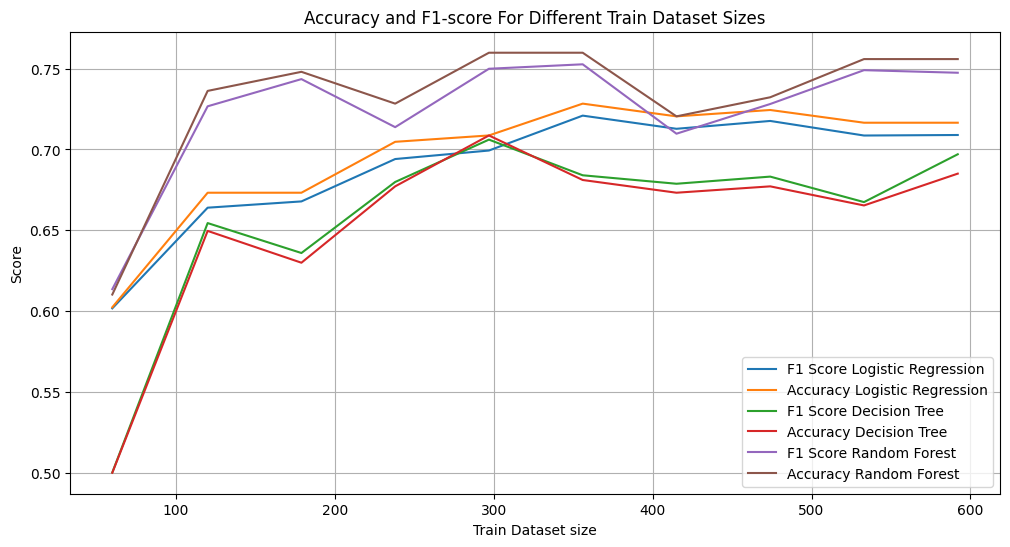

In [62]:
import warnings
warnings.filterwarnings('ignore')
learning_curve(X_train, X_test, C_base, penalty_base, max_depth, n_estimators)

**From the last graph we can conclude that the best results for every model can be obtained with the biggest available train dataset size (>500).**

#### 2.9. Gradient boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package. Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensemble using grid search or other methods. Please, explain your answer.

In [63]:
pip install -q catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [64]:
from catboost import CatBoostClassifier, Pool

In [65]:
dataset.head(5)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_numeric = le.fit_transform(y)
np.unique(y_numeric)

array([0, 1, 2, 3])

In [66]:
?xgb.XGBClassifier

Object `xgb.XGBClassifier` not found.


In [67]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
target_numeric = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_numeric,
                                                  random_state=42,
                                                  stratify=target_numeric,
                                                  test_size = 0.30)

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'max_depth': 6,
    'learning_rate': 0.05,
    'nthread': 4, # кол-во ядер cpu для параллельного обучения
    'objective': 'multi:softprob',  # Используем softprob для получения вероятностей
    'num_class': len(label_encoder.classes_),
    'eval_metric': 'mlogloss'
}

# Списки для хранения результатов
evals = [(dtrain, 'train'), (dval, 'eval')]

# Обучение модели с использованием ранней остановки
model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals,
                  early_stopping_rounds=10, verbose_eval=True)

# Получение лучшей модели
best_num_boost_round = model.best_iteration
print(f'Лучшее количество итераций: {best_num_boost_round}')

[0]	train-mlogloss:1.32183	eval-mlogloss:1.33743
[1]	train-mlogloss:1.26322	eval-mlogloss:1.29200
[2]	train-mlogloss:1.20996	eval-mlogloss:1.24950
[3]	train-mlogloss:1.16004	eval-mlogloss:1.20876
[4]	train-mlogloss:1.11439	eval-mlogloss:1.16998
[5]	train-mlogloss:1.07166	eval-mlogloss:1.13477
[6]	train-mlogloss:1.03189	eval-mlogloss:1.10177
[7]	train-mlogloss:0.99261	eval-mlogloss:1.07033
[8]	train-mlogloss:0.95420	eval-mlogloss:1.03992
[9]	train-mlogloss:0.91928	eval-mlogloss:1.01160
[10]	train-mlogloss:0.88464	eval-mlogloss:0.98499
[11]	train-mlogloss:0.85336	eval-mlogloss:0.95934
[12]	train-mlogloss:0.82442	eval-mlogloss:0.93640
[13]	train-mlogloss:0.79672	eval-mlogloss:0.91487
[14]	train-mlogloss:0.76978	eval-mlogloss:0.89511
[15]	train-mlogloss:0.74480	eval-mlogloss:0.87582
[16]	train-mlogloss:0.72094	eval-mlogloss:0.85823
[17]	train-mlogloss:0.69877	eval-mlogloss:0.84158
[18]	train-mlogloss:0.67618	eval-mlogloss:0.82658
[19]	train-mlogloss:0.65552	eval-mlogloss:0.81059
[20]	train

In [68]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [69]:
?RandomizedSearchCV

In [70]:
# sklearn logreg always uses softmax
def random_search_cv(X_train, y_train):
    model = LogisticRegression(max_iter = 1000,
                               solver = 'saga', #learning rate inside
                               tol = 1e-3,
                               random_state=42)
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100], # чем меньше, тем сильнее
        'penalty': ['l1', 'l2']
    }
    # StratifiedShuffleSplit сохраняет распределение классов,
    # выборки в отличие от StratifiedKFold могут пересекаться
    cv_methods = {'StratifiedShuffleSplit': StratifiedShuffleSplit(n_splits=10,
                                test_size = 0.2,
                                random_state=42),
                  'StratifiedKFold': StratifiedKFold(n_splits=10,
                                shuffle=True,
                                random_state=42)
    }

    scoring = {'accuracy': 'accuracy',
               'f1_macro': 'f1_macro',  # считаю, что она лучше для несбалансир классов
               'f1_weighted': 'f1_weighted',  # а для сбалансированных классов особой разницы нет
               'roc_auc_ovr': 'roc_auc_ovr'
              #  'pr_auc': make_scorer(macro_pr_auc, needs_proba=True)
    }
    results = {}

    for cv_name, cv in cv_methods.items():
        random_search = RandomizedSearchCV(model,
                                  param_grid,
                                  cv=cv,
                                  n_iter = 10,
                                  scoring=scoring,
                                  # refit='accuracy', # метрика для выбора лучшей модели
                                  refit='f1_macro',
                                  return_train_score=False)

        random_search.fit(X_train, y_train_encoded)

        results[cv_name] = {
            "Best parameters": random_search.best_params_,
            "Best accuracy": random_search.cv_results_['mean_test_accuracy'][random_search.best_index_],
            "F1 macro": random_search.cv_results_['mean_test_f1_macro'][random_search.best_index_],
            "F1 weighted": random_search.cv_results_['mean_test_f1_weighted'][random_search.best_index_],
            "ROC-AUC": random_search.cv_results_['mean_test_roc_auc_ovr'][random_search.best_index_],

        }

    return results

In [77]:
def catboost_random_search(X_train, y_train):
    # del model
    model = CatBoostClassifier(
                loss_function='MultiClass',
                # eval_metric='Accuracy',
                logging_level='Silent',
                random_state=42)
    scoring = {
          'accuracy': 'accuracy',
          'f1_macro': 'f1_macro',  # считаю, что она лучше для несбалансир классов
          'f1_weighted': 'f1_weighted',  # а для сбалансированных классов особой разницы нет
          'roc_auc_ovr': 'roc_auc_ovr'}
    param_grid = {
          'iterations': [100, 200, 300, 350, 400, 450, 500],
          'depth': [3, 4, 5, 6],
          'learning_rate': [0.01, 0.05, 0.1, 0.15]
      }
    cv = StratifiedKFold(n_splits=10)

    random_search = RandomizedSearchCV(model,
                                       param_grid,
                                       cv=cv,
                                       scoring=scoring,
                                       refit='f1_macro',
                                       n_iter=10,
                                       return_train_score=False
                                       )

    grid_result = random_search.fit(X_train, y_train)
    res = (random_search.best_params_, random_search.best_score_)
    print("Best parameters", random_search.best_params_)
    print("Best cross-validation score", random_search.best_score_)

In [78]:
catboost_random_search(X_train, y_train)

Best parameters {'learning_rate': 0.15, 'iterations': 400, 'depth': 6}
Best cross-validation score 0.7551135553260382


In [80]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score


def catboost_model(X_train, y_train):
    # del model
    """Best params applied"""
    params = {
        'eval_metric': 'TotalF1',
        'n_estimators': 450,
        'random_state': 42,
        'verbose': 100,
        'max_depth': 5,
        'learning_rate': 0.15
    }

    model = CatBoostClassifier(**params)

    cv = StratifiedKFold(n_splits = 10,
                         shuffle = True,
                         random_state = 42)

    scores = cross_val_score(model, X_train,
                             y_train, cv=cv,
                             scoring='f1_macro'
    )

    print(f'CV F1_macro scores: {scores}')
    print(f'Mean F1_macro: {scores.mean():.4f}')

    model.fit(X_train, y_train)
    return model

In [81]:
catboost_model(X_train, y_train)

0:	learn: 0.5803654	total: 3.46ms	remaining: 1.55s
100:	learn: 0.9658606	total: 186ms	remaining: 641ms
200:	learn: 0.9981203	total: 370ms	remaining: 459ms
300:	learn: 1.0000000	total: 554ms	remaining: 274ms
400:	learn: 1.0000000	total: 737ms	remaining: 90ms
449:	learn: 1.0000000	total: 844ms	remaining: 0us
0:	learn: 0.5776356	total: 2.32ms	remaining: 1.04s
100:	learn: 0.9582081	total: 184ms	remaining: 637ms
200:	learn: 0.9981203	total: 368ms	remaining: 456ms
300:	learn: 1.0000000	total: 551ms	remaining: 273ms
400:	learn: 1.0000000	total: 734ms	remaining: 89.7ms
449:	learn: 1.0000000	total: 826ms	remaining: 0us
0:	learn: 0.5950187	total: 2.24ms	remaining: 1s
100:	learn: 0.9679219	total: 201ms	remaining: 695ms
200:	learn: 0.9981238	total: 384ms	remaining: 476ms
300:	learn: 1.0000000	total: 568ms	remaining: 281ms
400:	learn: 1.0000000	total: 752ms	remaining: 91.9ms
449:	learn: 1.0000000	total: 840ms	remaining: 0us
0:	learn: 0.5926908	total: 2.1ms	remaining: 942ms
100:	learn: 0.9602908	tot

**Попробую удаление признаков** для улучшения качества

На основании **Sklearn RFECV (с кросс-валидацией)**

In [84]:
# Важно проводить на тренировочном датасете без валидационной части,
# чтобы избежать data leakage
from sklearn.feature_selection import RFECV
del model

params = {
    'eval_metric': 'TotalF1',  # аналог macro-f1, обычное усреднение
    'n_estimators': 450,
    'random_state': 42,
    'verbose': 100,
    'max_depth': 5,
    'learning_rate': 0.15
}
model = CatBoostClassifier(**params)

rfecv = RFECV(
    estimator=model,
    step=1,
    cv=5,  # 5 фолдов валидации
    # scoring='accuracy'
    scoring='f1_macro'
)

rfecv.fit(X_train, y_train)
selected_features = X_train.columns[rfecv.support_]

print("Оптимальное число фичей:", rfecv.n_features_)
print("Отобранные фичи:", selected_features)

0:	learn: 0.5751335	total: 2.25ms	remaining: 1.01s
100:	learn: 0.9681591	total: 197ms	remaining: 680ms
200:	learn: 1.0000000	total: 373ms	remaining: 462ms
300:	learn: 1.0000000	total: 550ms	remaining: 272ms
400:	learn: 1.0000000	total: 733ms	remaining: 89.6ms
449:	learn: 1.0000000	total: 939ms	remaining: 0us
0:	learn: 0.5700636	total: 9.4ms	remaining: 4.22s
100:	learn: 0.9659600	total: 355ms	remaining: 1.23s
200:	learn: 0.9978858	total: 526ms	remaining: 652ms
300:	learn: 1.0000000	total: 703ms	remaining: 348ms
400:	learn: 1.0000000	total: 872ms	remaining: 107ms
449:	learn: 1.0000000	total: 958ms	remaining: 0us
0:	learn: 0.6660495	total: 2.07ms	remaining: 928ms
100:	learn: 0.9531339	total: 171ms	remaining: 590ms
200:	learn: 1.0000000	total: 358ms	remaining: 444ms
300:	learn: 1.0000000	total: 530ms	remaining: 262ms
400:	learn: 1.0000000	total: 703ms	remaining: 85.9ms
449:	learn: 1.0000000	total: 788ms	remaining: 0us
0:	learn: 0.5950432	total: 1.72ms	remaining: 772ms
100:	learn: 0.9616794

In [85]:
selected_features

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

In [86]:
X_train_rfe = X_train[selected_features]

In [87]:
catboost_model(X_train_rfe, y_train)

0:	learn: 0.5803654	total: 6.56ms	remaining: 2.95s
100:	learn: 0.9658606	total: 459ms	remaining: 1.58s
200:	learn: 0.9981203	total: 794ms	remaining: 983ms
300:	learn: 1.0000000	total: 1.36s	remaining: 676ms
400:	learn: 1.0000000	total: 1.91s	remaining: 234ms
449:	learn: 1.0000000	total: 2.05s	remaining: 0us
0:	learn: 0.5776356	total: 5.57ms	remaining: 2.5s
100:	learn: 0.9582081	total: 319ms	remaining: 1.1s
200:	learn: 0.9981203	total: 603ms	remaining: 747ms
300:	learn: 1.0000000	total: 905ms	remaining: 448ms
400:	learn: 1.0000000	total: 1.25s	remaining: 152ms
449:	learn: 1.0000000	total: 1.48s	remaining: 0us
0:	learn: 0.5950187	total: 5.26ms	remaining: 2.36s
100:	learn: 0.9679219	total: 547ms	remaining: 1.89s
200:	learn: 0.9981238	total: 1.33s	remaining: 1.65s
300:	learn: 1.0000000	total: 2.12s	remaining: 1.05s
400:	learn: 1.0000000	total: 2.69s	remaining: 329ms
449:	learn: 1.0000000	total: 2.99s	remaining: 0us
0:	learn: 0.5926908	total: 3.01ms	remaining: 1.35s
100:	learn: 0.9602908	to

# Код классификации с нуля

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('car_data.csv', header = None, index_col = 0)
print(dataset.shape)
dataset.head(2)

(846, 19)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,,,,,,,,,,,,,,,,,,,
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van


In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
y.head(1)

,19
0,
0,van


In [ ]:
y.unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [ ]:
y.value_counts(normalize=True)

,proportion
19,
bus,0.257683
saab,0.256501
opel,0.250591
van,0.235225


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42,
                                                    stratify = y,
                                                    test_size = 0.35)
print(X_train.shape)
print(X_test.shape)

(549, 18)
(297, 18)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.17761902, -1.58569254, -1.53990869, ...,  0.50169668,
         1.31324692,  1.0035028 ],
       [-1.04165686, -0.45195925, -1.47561408, ..., -0.93745494,
        -1.606327  , -1.83839939],
       [-0.42448697,  0.84373594,  0.51751894, ...,  0.72310463,
         0.34005562,  0.4621881 ],
       ...,
       [-1.16509083, -1.42373064, -0.44690026, ...,  2.60507213,
         0.01565851, -0.0791266 ],
       [-0.91822288, -0.28999735, -0.76837333, ..., -0.38393508,
        -1.606327  , -1.83839939],
       [-1.16509083, -0.45195925, -0.38260565, ...,  0.8338086 ,
        -0.30873859, -0.34978395]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [ ]:
# Logistic Regression
# del model_logreg
model_logreg = LogisticRegression(
                      solver = 'saga',
                      tol = 1e-3,
                      penalty = 'l2',
                      C = 0.1,
                      max_iter = 1000,
                      random_state = 42
)
model_logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=42, solver='saga',
                   tol=0.001)

In [ ]:
y_pred = model_logreg.predict(X_test_scaled)
y_pred_proba = model_logreg.predict_proba(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='macro')

In [ ]:
print(accuracy)
print(f1_macro)
print(roc_auc)

0.7710437710437711
0.7674528171788165
0.9252284306325659


In [ ]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.3 MB/s eta 0:00:00


In [ ]:
# Gradient Boosting
from catboost import CatBoostClassifier

In [ ]:
model_cb = CatBoostClassifier(
    iterations = 300,
    max_depth = 5,
    learning_rate = 0.1,
    loss_function = 'MultiClass',
    random_state=42,
    verbose=100
)

model_cb.fit(X_train, y_train)


0:	learn: 1.3093425	total: 57.1ms	remaining: 17.1s
100:	learn: 0.3901082	total: 765ms	remaining: 1.51s
200:	learn: 0.2416658	total: 1.56s	remaining: 769ms
299:	learn: 0.1627586	total: 2.47s	remaining: 0us


In [ ]:
y_pred = model_cb.predict(X_test)
y_pred_proba = model_cb.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='macro')

In [ ]:
print(accuracy)
print(f1_macro)
print(roc_auc)

0.797979797979798
0.7951906204018064
0.9445179617172098
